In [3]:
import os
project_root = '/Users/Owen/Dropbox/Mason/Mason_LFN/labour-flow-networks'
#project_root = '/Users/student/Dropbox/Mason/Mason_LFN/labour-flow-networks'
os.chdir(project_root)
import src.general as gen
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
input_dir = os.path.join(project_root, 'data', 'processed')
input_filenames = [
                    #single years, deaths all
                    ['mcres_flows1996-1997_deathsall.pkl',
                        'res_flows1996-1997_deathsall.pkl'],
                    ['mcres_flows1996-1997_deaths1996-2000.pkl',
                        'res_flows1996-1997_deaths1996-2000.pkl']
                ]

In [5]:
for filename_pair in input_filenames:
    mc_filepath = os.path.join(input_dir, filename_pair[0])
    actual_filepath = os.path.join(input_dir, filename_pair[1])
    gen.CheckSameData(mc_filepath, actual_filepath)
    mc = gen.GetPkl(mc_filepath)
    mc_avg = dict()
    for key in mc.keys():
        avg = sum(mc[key])/float(len(mc[key]))
        mc_avg[key] = avg
    actual = gen.GetPkl(actual_filepath)

In [6]:
#ratios
ratios = dict()
for key in actual.keys():
    ratio = actual[key]/float(mc_avg[key])
    ratios[key] = ratio

<Container object of 5 artists>

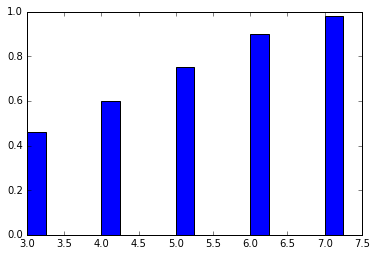

In [7]:
start = 3
end = 8
plt.bar(ratios.keys()[start:end], ratios.values()[start:end], width=0.25)
#plt.plot(range(start, end), [1 for x in range(start, end)])